In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

conf = SparkConf().setMaster('local').setAppName('ML_learning')
sqlcontext = SQLContext(sc)

In [3]:
import pandas as pd
spark = SparkSession.builder.appName('lrex').getOrCreate()
from pyspark.ml.regression import LinearRegression
from pyspark import SQLContext, SparkConf, SparkContext
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit

In [4]:
import plotly.graph_objects as go

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
CoronaBeer = spark.read.csv('Corona.csv',inferSchema=True, header=True)

In [8]:
CoronaBeer.createOrReplaceTempView('CoronaBeer')
CoronaBeer=spark.sql('select row_number() over (order by "Close") as num, * from CoronaBeer')

In [9]:
HeinekenBeer = spark.read.csv('Heineken.csv',inferSchema=True, header=True)

In [10]:
HeinekenBeer.createOrReplaceTempView('HeinekenBeer')
HeinekenBeer=spark.sql('select row_number() over (order by "Close") as num, * from HeinekenBeer')

In [11]:
CarlsbergBeer = spark.read.csv('Carlsberg.csv',inferSchema=True, header=True)

In [12]:
CarlsbergBeer.createOrReplaceTempView('CarlsbergBeer')
CarlsbergBeer=spark.sql('select row_number() over (order by "Close") as num, * from CarlsbergBeer')

In [13]:
GuinnessBeer = spark.read.csv('Guinness.csv',inferSchema=True, header=True)

In [14]:
GuinnessBeer.createOrReplaceTempView('GuinnessBeer')
GuinnessBeer=spark.sql('select row_number() over (order by "Close") as num, * from GuinnessBeer')

In [15]:
GuinnessBeer.toPandas().head()

,num,Date,Open,High,Low,Close,Adj Close,Volume
0,1,2020-01-02,167.679993,168.320007,166.669998,166.750000,165.232269,369900
1,2,2020-01-03,165.839996,167.080002,165.820007,166.410004,164.895355,376300
2,3,2020-01-06,167.479996,167.860001,167.149994,167.720001,166.193436,342800
3,4,2020-01-07,167.330002,167.330002,166.080002,166.279999,164.766541,366100
4,5,2020-01-08,168.179993,168.990005,167.820007,168.500000,166.966339,366100


In [16]:
CoronaBeer.createOrReplaceTempView("CoronaBeer")

In [17]:
CoronaBeer=spark\
.sql(\
     "SELECT num,Close \
     FROM CoronaBeer \
     WHERE num>52 ")

In [18]:
HeinekenBeer.createOrReplaceTempView("HeinekenBeer")

In [19]:
HeinekenBeer=spark\
.sql(\
     "SELECT num,Close \
     FROM HeinekenBeer \
     WHERE num>52 ")

In [20]:
CarlsbergBeer.createOrReplaceTempView("CarlsbergBeer")

In [21]:
CarlsbergBeer=spark\
.sql(\
     "SELECT num,Close \
     FROM CarlsbergBeer \
     WHERE num>52 ")

In [22]:
GuinnessBeer.createOrReplaceTempView("GuinnessBeer")

In [23]:
GuinnessBeer=spark\
.sql(\
     "SELECT num,Close \
     FROM GuinnessBeer \
     WHERE num>52")

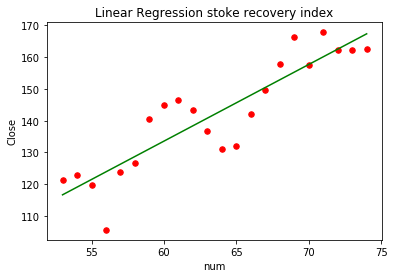

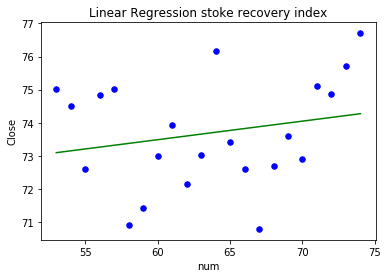

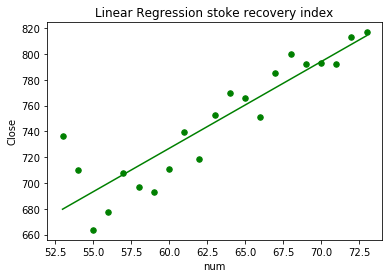

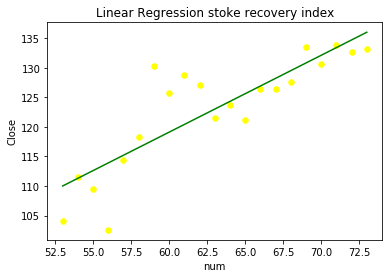

In [24]:

data = CoronaBeer.select("*")
x1 = data.toPandas()['num'].values.tolist()
y1 = data.toPandas()['Close'].values.tolist()
plt.scatter(x1, y1, color='red', s=30)
plt.xlabel('num')
plt.ylabel('Close')
plt.title('Linear Regression stoke recovery index')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()



data = HeinekenBeer.select("*")
x1 = data.toPandas()['num'].values.tolist()
y1 = data.toPandas()['Close'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('num')
plt.ylabel('Close')
plt.title('Linear Regression stoke recovery index')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()


data = CarlsbergBeer.select("*")
x1 = data.toPandas()['num'].values.tolist()
y1 = data.toPandas()['Close'].values.tolist()
plt.scatter(x1, y1, color='green', s=30)
plt.xlabel('num')
plt.ylabel('Close')
plt.title('Linear Regression stoke recovery index')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()


data = GuinnessBeer.select("*")
x1 = data.toPandas()['num'].values.tolist()
y1 = data.toPandas()['Close'].values.tolist()
plt.scatter(x1, y1, color='yellow', s=30)
plt.xlabel('num')
plt.ylabel('Close')
plt.title('Linear Regression stoke recovery index')
p1 = polyfit(x1, y1, 1)
plt.plot(x1, np.polyval(p1,x1), 'g-' )
plt.show()